# Network Creation and Analysis

## 1. Network Creation

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scripts.get_graph import get_graph
import numpy as np
from networkx.algorithms import bipartite
import powerlaw
import seaborn as sns

#### Create Bipartite Network from the adjacency matrix

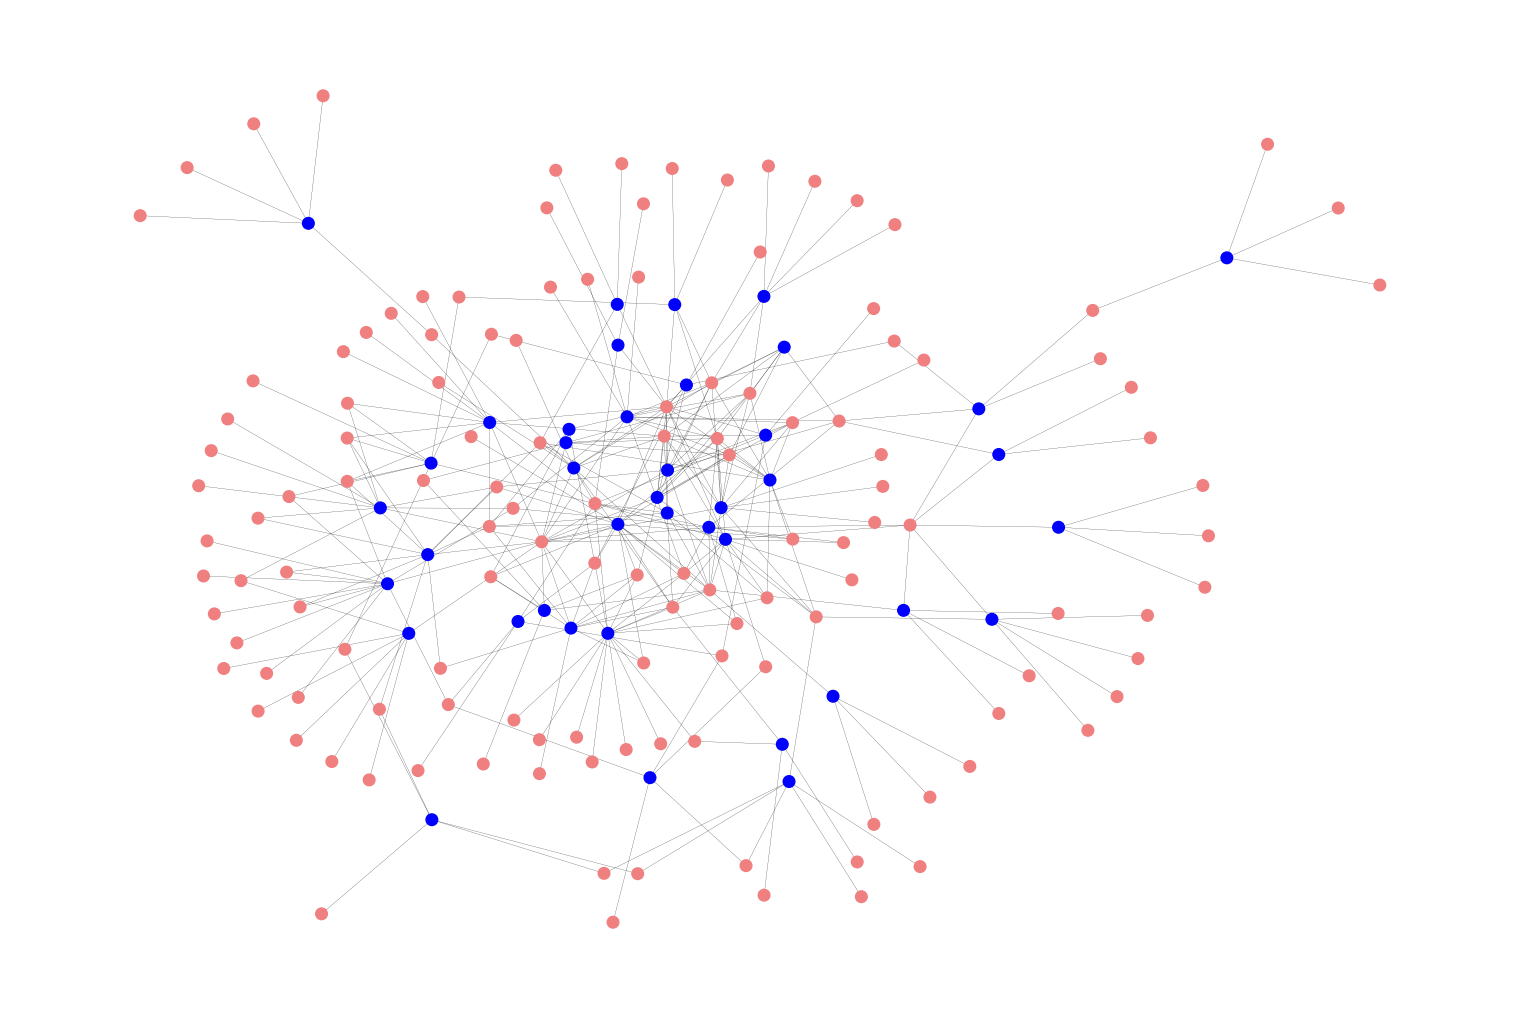

In [29]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

num_rows, num_cols = adjacency_matrix.shape

network = get_graph(adjacency_matrix)

# Calculate Kamada-Kawai layout
pos = nx.kamada_kawai_layout(network)

# Try different layouts

# pos = nx.circular_layout(G)
# pos = nx.random_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.fruchterman_reingold_layout(G)

# Draw the bipartite graph
plt.figure(figsize=(15, 10))  # Adjust the figure size

nx.draw(
    network,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color=[
        "blue" if n in range(num_rows) else "lightcoral" for n in network.nodes
    ],
)
plt.show()

#### Create Unipartite Network from adjacency matrix

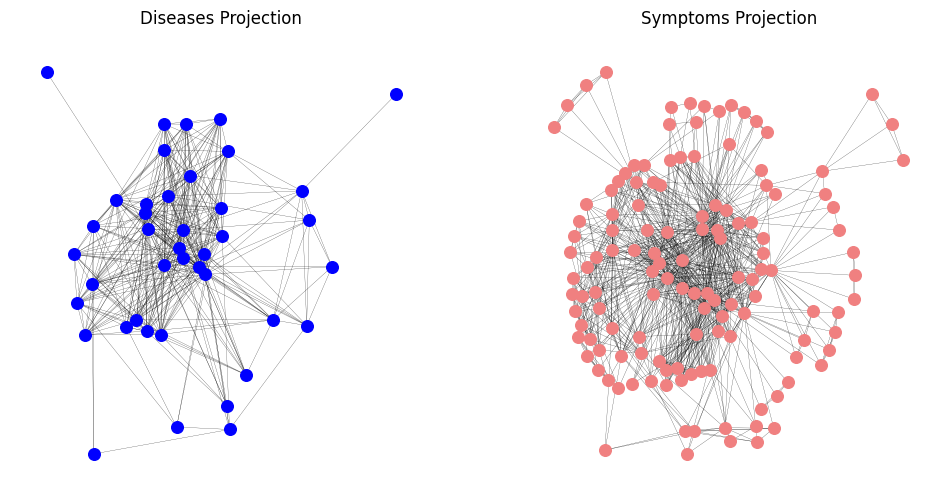

In [30]:
# Create a bipartite graph from the adjacency matrix
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

graph = get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
symptoms = set(graph) - diseases

# Create unipartite projections
g_diseases = nx.bipartite.projected_graph(graph, diseases)
g_symptoms = nx.bipartite.projected_graph(graph, symptoms)

# Compute the layout positions of the two unipartite projections
pos = nx.kamada_kawai_layout(graph)

# Draw the unipartite projections (optional)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Diseases Projection")
nx.draw(
    g_diseases,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="blue",
)

plt.subplot(1, 2, 2)
plt.title("Symptoms Projection")
nx.draw(
    g_symptoms,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="lightcoral",
)

plt.show()

## 2. Metrics Calculation

#### Compute the Hidalgo Hausmann algorithm 

In [31]:
from scripts.hid_haus import hid_hous

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]
[kd, ks] = hid_hous(adjacency_matrix, 10)

#### Compute Betweenness Centrality

In [32]:
graph_betweenness = nx.betweenness_centrality(graph)
diseases_betweenness = nx.betweenness_centrality(g_diseases)
symptoms_betweenness = nx.betweenness_centrality(g_symptoms)

print("Betweenness centrality of the whole graph")
print(graph_betweenness)
print("Betweenness centrality of the diseases projection")
print(diseases_betweenness)
print("Betweenness centrality of the symptoms projection")
print(symptoms_betweenness)

Betweenness centrality of the whole graph
{0: 0.03437106938238824, 1: 0.0348813209494324, 2: 0.0348813209494324, 3: 0.047065794434920497, 4: 0.023848275233433677, 5: 0.019123112989114985, 6: 0.022036914241835077, 7: 0.020424241015148725, 8: 0.07996537574461474, 9: 0.012338064788723471, 10: 0.1056953581423998, 11: 0.15408834771813187, 12: 0.053973156790648784, 13: 0.046370829033367734, 14: 0.07299990490213931, 15: 0.024049997879754082, 16: 0.03400052540187364, 17: 0.023882357734059643, 18: 0.0036312882003437554, 19: 0.05877124633552194, 20: 0.010135250034898796, 21: 0.02736756729603423, 22: 0.07406952338258488, 23: 0.022267256115778344, 24: 0.0586431043483341, 25: 0.07499406701440452, 26: 0.09854801283350725, 27: 0.03942890272394795, 28: 0.034658886227382744, 29: 0.016494695132220107, 30: 0.049428128649132166, 31: 0.05208616705677099, 32: 0.024104734618544434, 33: 0.030924468089635216, 34: 0.036529335461714954, 35: 0.05126512814847302, 36: 0.06701349054250132, 37: 0.11662381249091842, 3

#### Compute Clustering Coefficient

In [33]:
# Compute clustering coefficient
clustering_coefficient = nx.bipartite.average_clustering(graph)

print(f"Average Clustering Coefficient: {clustering_coefficient}")

# Compute clustering coefficient for symptoms
diseases_clustering = nx.bipartite.clustering(
    graph, nodes=range(adjacency_matrix.shape[0])
)

# Compute clustering coefficient for diseases
symptoms_clustering = nx.bipartite.clustering(
    graph,
    nodes=range(
        adjacency_matrix.shape[0], adjacency_matrix.shape[1] + adjacency_matrix.shape[0]
    ),
)

graph.nodes.data()

Average Clustering Coefficient: 0.34025818113833406


NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 0}, 6: {'bipartite': 0}, 7: {'bipartite': 0}, 8: {'bipartite': 0}, 9: {'bipartite': 0}, 10: {'bipartite': 0}, 11: {'bipartite': 0}, 12: {'bipartite': 0}, 13: {'bipartite': 0}, 14: {'bipartite': 0}, 15: {'bipartite': 0}, 16: {'bipartite': 0}, 17: {'bipartite': 0}, 18: {'bipartite': 0}, 19: {'bipartite': 0}, 20: {'bipartite': 0}, 21: {'bipartite': 0}, 22: {'bipartite': 0}, 23: {'bipartite': 0}, 24: {'bipartite': 0}, 25: {'bipartite': 0}, 26: {'bipartite': 0}, 27: {'bipartite': 0}, 28: {'bipartite': 0}, 29: {'bipartite': 0}, 30: {'bipartite': 0}, 31: {'bipartite': 0}, 32: {'bipartite': 0}, 33: {'bipartite': 0}, 34: {'bipartite': 0}, 35: {'bipartite': 0}, 36: {'bipartite': 0}, 37: {'bipartite': 0}, 38: {'bipartite': 0}, 39: {'bipartite': 0}, 40: {'bipartite': 0}, 41: {'bipartite': 1}, 42: {'bipartite': 1}, 43: {'bipartite': 1}, 44: {'bipartite': 1}, 45: {'

## 3. Metrics Visualization

#### First level metrics (degree) distribution 

Text(0, 0.5, 'Frequency (log scale)')

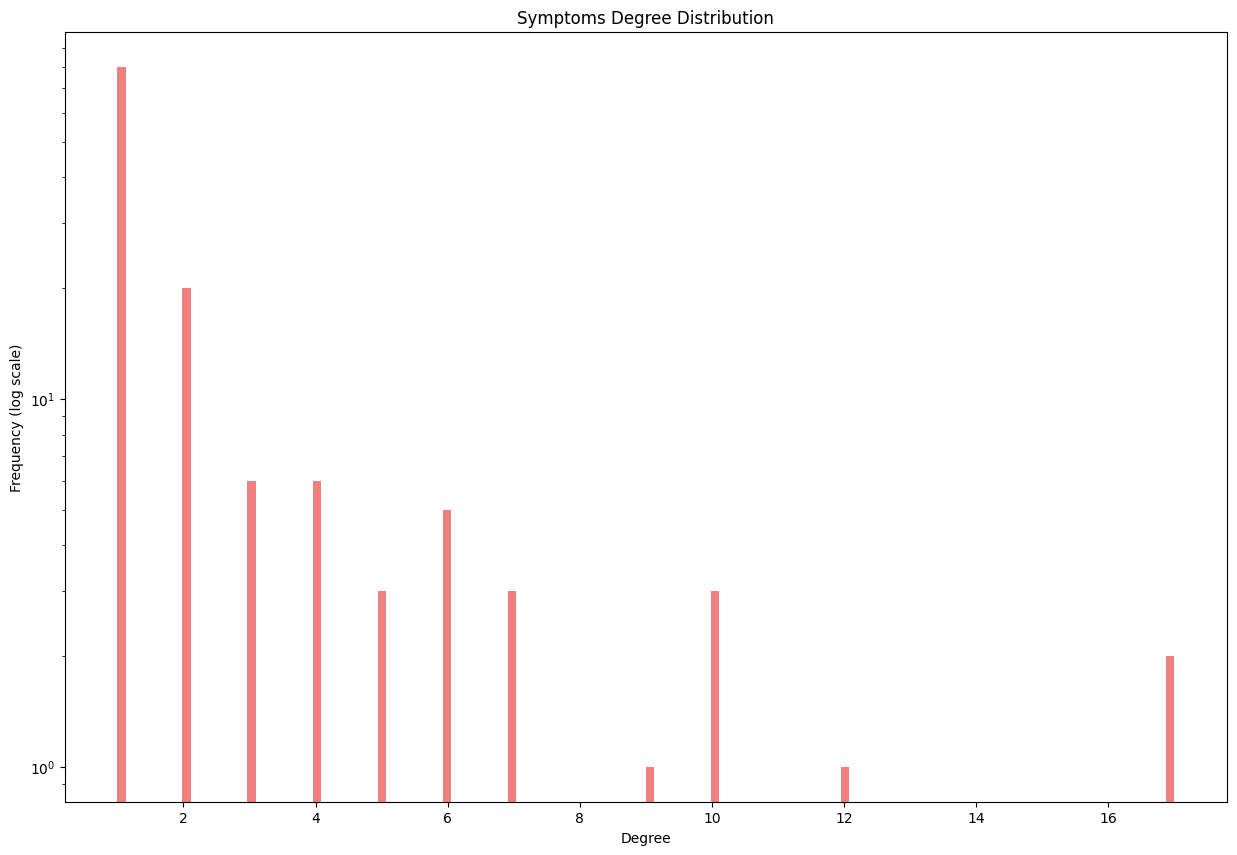

In [34]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(15, 10))
plt.hist(ks[:,0], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")


Text(0, 0.5, 'Frequency (log scale)')

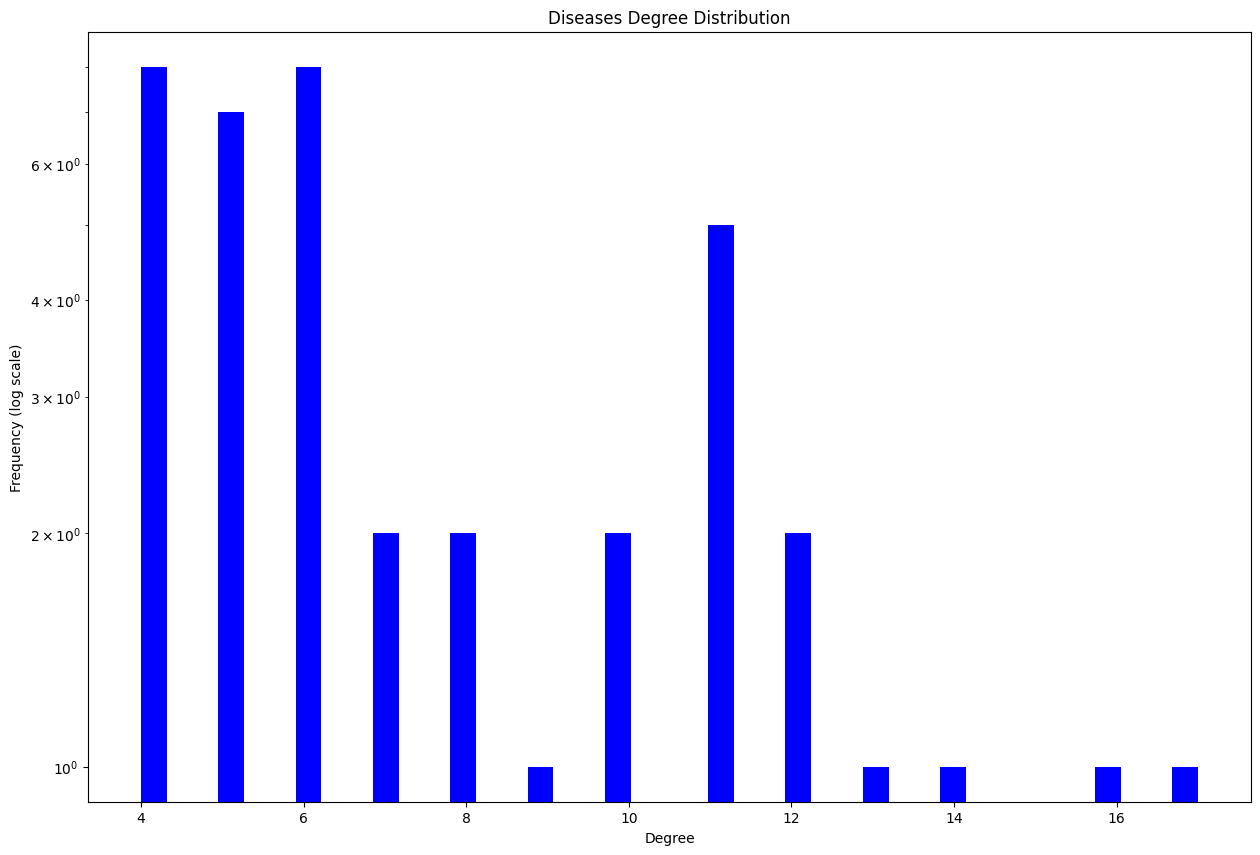

In [35]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(15, 10))
plt.hist(kd[:,0], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

#### Second level metrics distribution

Text(0, 0.5, 'Frequency (log scale)')

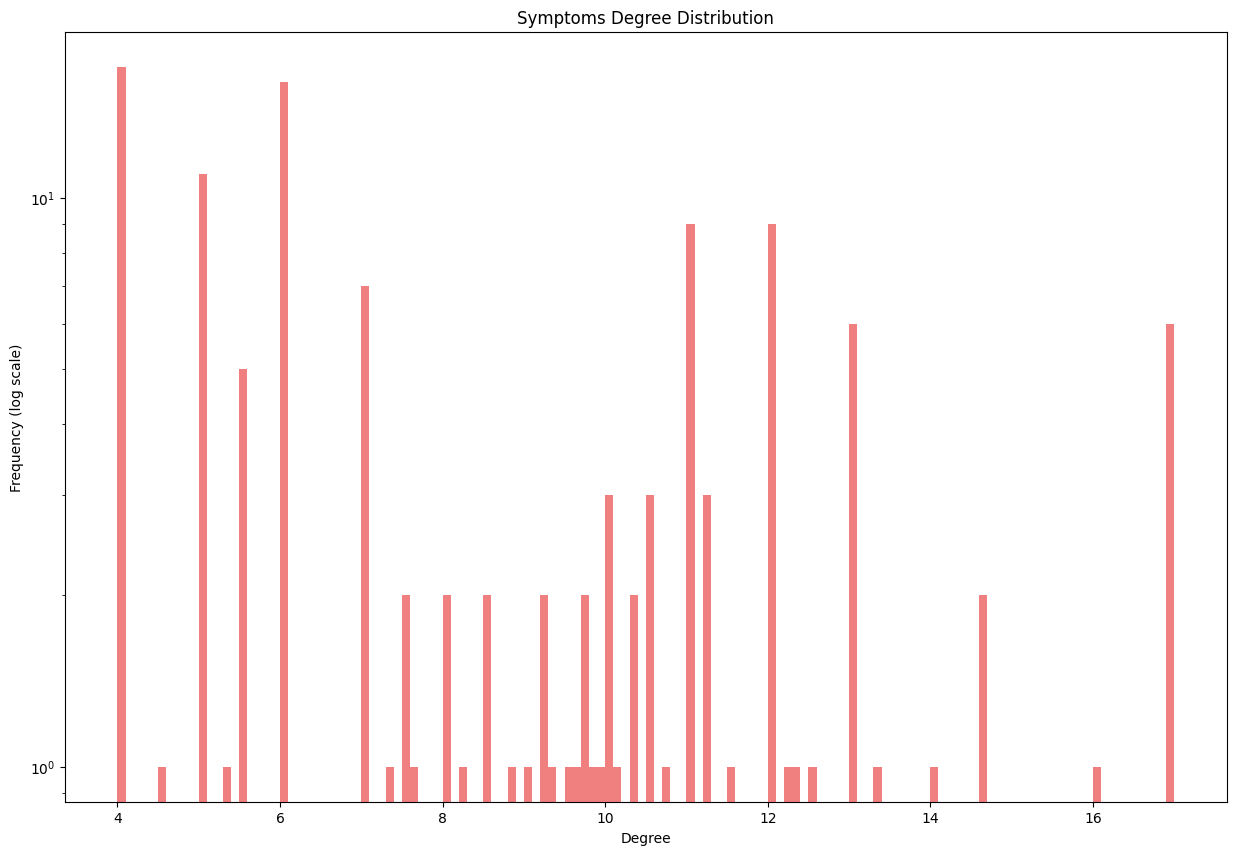

In [36]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(15, 10))
plt.hist(ks[:,1], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

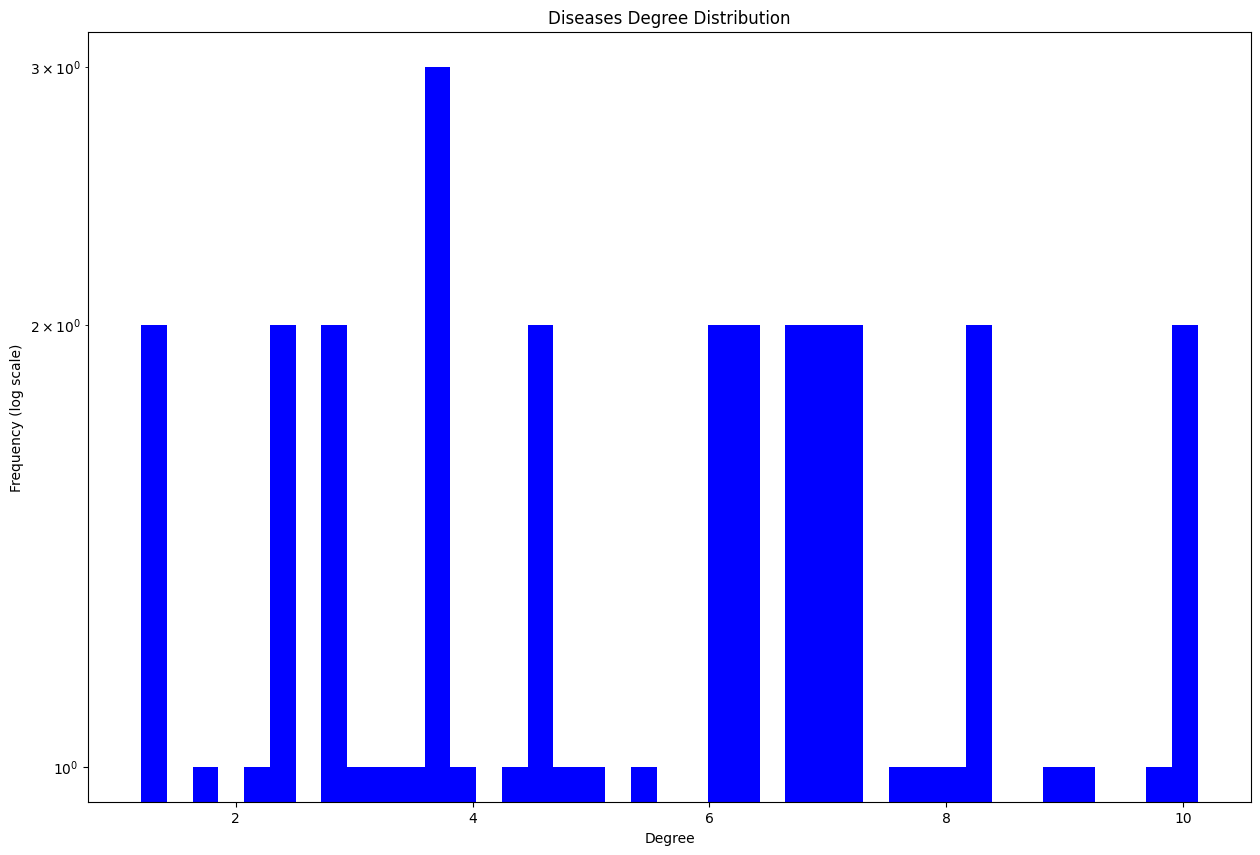

In [37]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(15, 10))
plt.hist(kd[:,1], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

#### Power Law Test (WIP)

Calculating best minimal value for power law fit
Power-law alpha parameter: 2.980091301936618


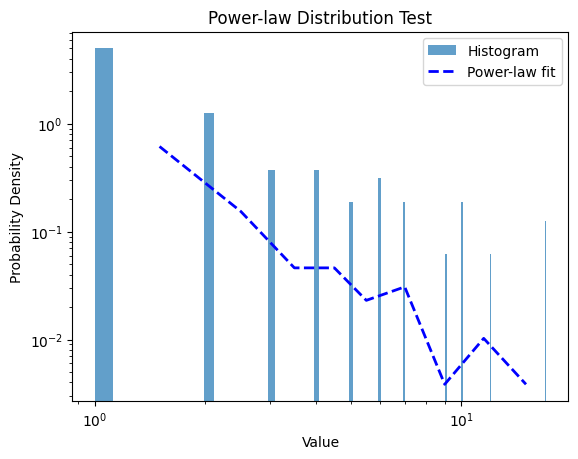

In [38]:
# Generate synthetic data following a power-law distribution
data = ks[:,0]  # You can replace this with your actual data

# Plot the histogram of the data
plt.hist(data, bins=ks.shape[0], density=True, alpha=0.7, label='Histogram')

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Plot the power-law fit
fit.plot_pdf(color='b', linestyle='--', linewidth=2, label='Power-law fit')

# Display the parameters of the power-law fit
print(f"Power-law alpha parameter: {fit.alpha}")

# Show the plot
plt.title('Power-law Distribution Test')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#### Betweenness Centrality Visualization 

Text(0, 0.5, 'Frequency (log scale)')

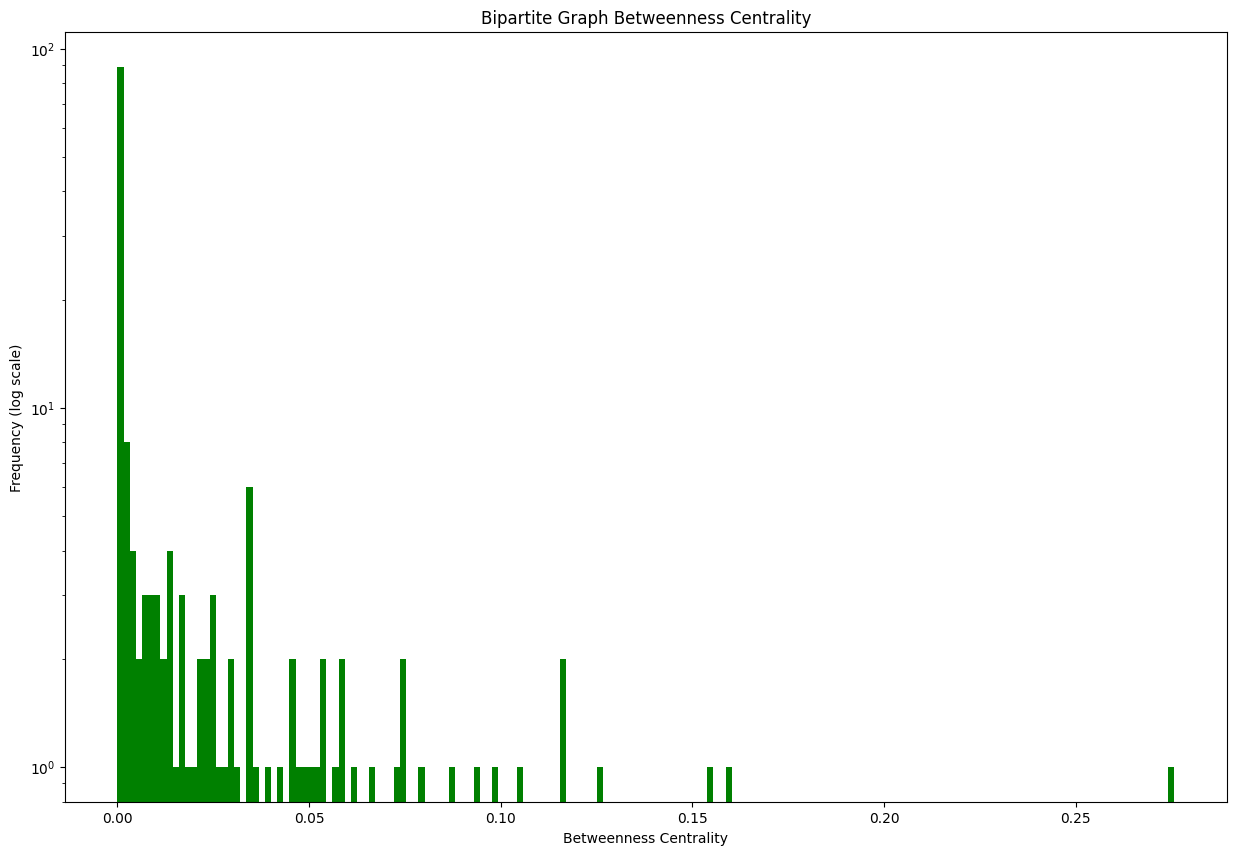

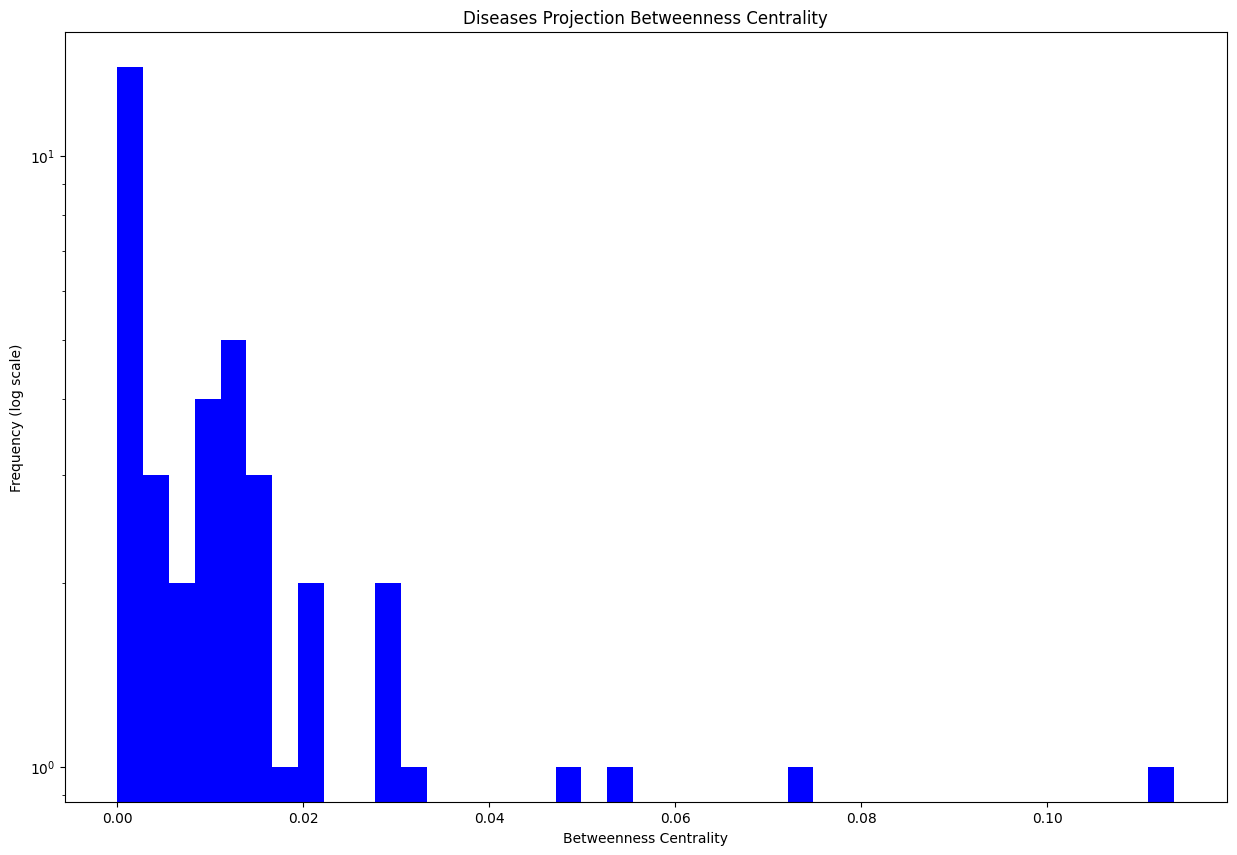

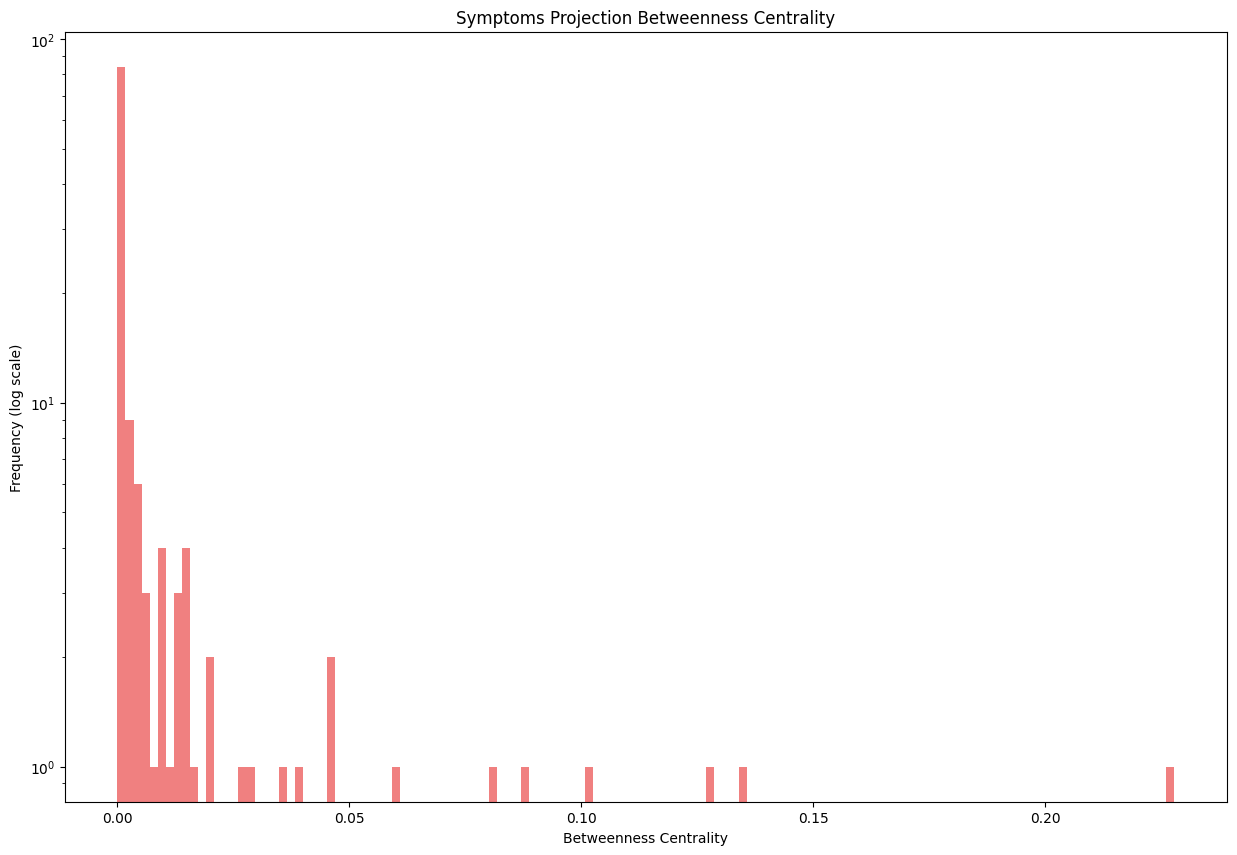

In [39]:
# Comparison of betweenness centrality of the bipartite graph and its projections

# Plot the betweenness centrality of the bipartite graph
plt.figure(figsize=(15, 10))
plt.hist(
    graph_betweenness.values(),
    bins=graph.number_of_nodes(),
    log=True,
    color="green",
)
plt.title("Bipartite Graph Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the diseases projection
plt.figure(figsize=(15, 10))
plt.hist(
    diseases_betweenness.values(),
    bins=g_diseases.number_of_nodes(),
    log=True,
    color="blue",
)
plt.title("Diseases Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the symptoms projection
plt.figure(figsize=(15, 10))
plt.hist(
    symptoms_betweenness.values(),
    bins=g_symptoms.number_of_nodes(),
    log=True,
    color="lightcoral",
)
plt.title("Symptoms Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

<BarContainer object of 41 artists>

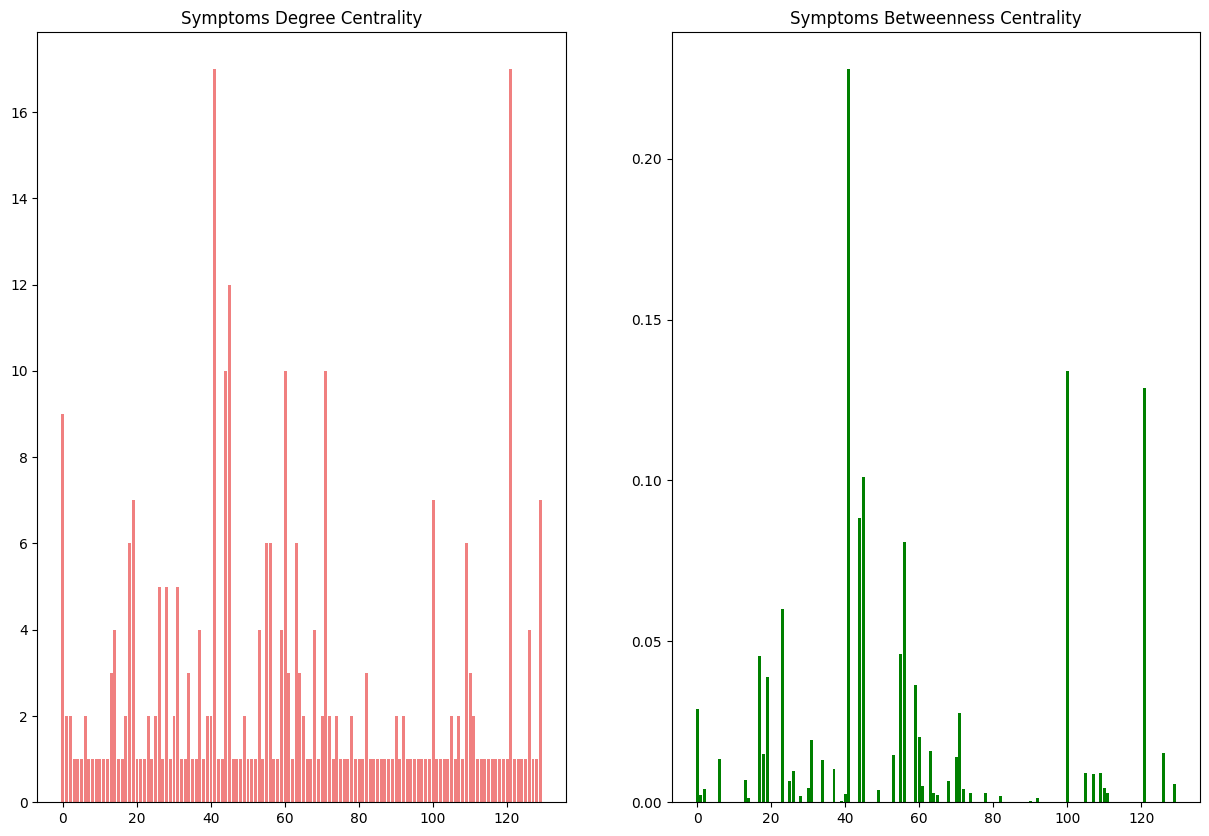

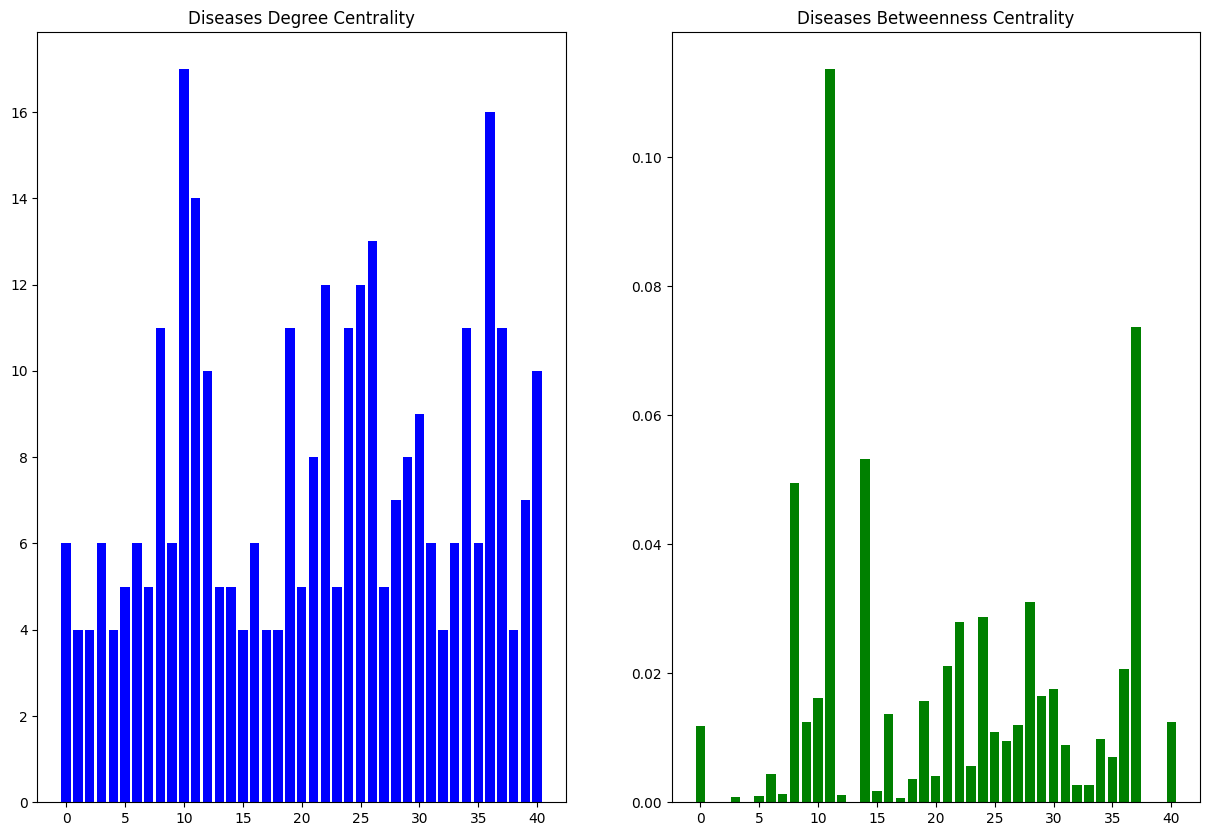

In [72]:
# Compare degree centrality and betweenness centrality for the symptoms using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Symptoms Degree Centrality")
plt.bar(range(ks.shape[0]), ks[:,0], color='lightcoral', label='Degree Centrality')
plt.subplot(1, 2, 2)
plt.title("Symptoms Betweenness Centrality")
plt.bar(range(ks.shape[0]), list(symptoms_betweenness.values())[:-1], color='g', label='Betweenness Centrality')

# Compare degree centrality and betweenness centrality for the disease using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Diseases Degree Centrality")
plt.bar(range(kd.shape[0]), kd[:,0], color='b', label='Degree Centrality')
plt.subplot(1, 2, 2)
plt.title("Diseases Betweenness Centrality")
plt.bar(range(kd.shape[0]), list(diseases_betweenness.values()), color='g', label='Betweenness Centrality')
